# Clase 3


## Validación

<img src="validation.png" width="600px" >

## Cross Validation

<img src="crossvalidation.png" width="600px" >

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
iris = load_iris()

In [3]:
X = iris["data"]
y = iris["target"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
model = KNeighborsClassifier(n_neighbors=5)

In [9]:
cross_val_score(model, X_train, y_train, cv=5)

array([0.95652174, 0.95652174, 0.90909091, 1.        , 1.        ])

In [10]:
X_train.shape

(112, 4)

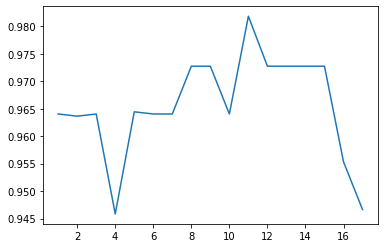

In [13]:
scores = []
for n in range(1,18):
    model = KNeighborsClassifier(n_neighbors=n)
    scores.append(cross_val_score(model, X_train, y_train, cv=5).mean())
plt.plot(range(1,18), scores)

In [21]:
final_model = KNeighborsClassifier(n_neighbors=11)
final_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

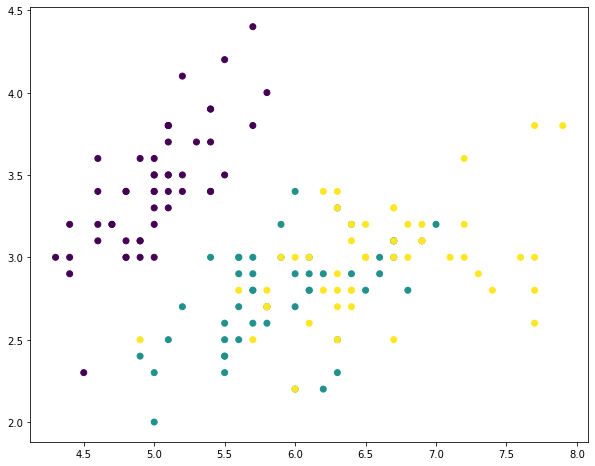

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],c=y)

In [19]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test, final_model.predict(X_test))

0.9736842105263158

## Regresión

<img src="fig1.jpeg" width="600px" >

<img src="fig2.jpeg" width="600px" >

### Regresión lineal

Se utiliza una ecuación lineal para modelar el problema

<img src="eq1.jpeg" width="300px" >

En su forma vectorizada se puede escribir como 

<img src="eq2.jpeg" width="200px" >

##### Funcion de coste

Se utiliza la Raiz del Error Cuadrático Medio. Es siempre convexa para el problema lineal

<img src="eq3.jpeg" width="300px" >


Sin embargo las operaciones se realizan con el error cuadrático medio porque su derivada es más sencilla y da el mismo resultado

<img src="eq4.jpeg" width="300px" >


Este es uno de los pocos problemas que se pueden resolver analíticamente

<img src="img1.jpg" width="600px" >


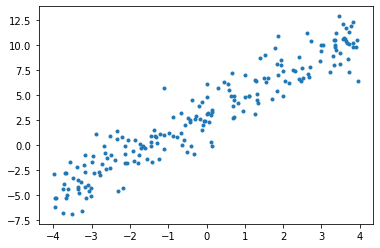

In [37]:
x = np.random.uniform(-4,4,(200,1))
y = 3 + 2*x + 1.5*np.random.randn(200,1)
plt.plot(x,y, ".")

In [32]:
from sklearn.linear_model import LinearRegression

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [40]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [41]:
LR.coef_

array([[1.95947185]])

In [42]:
LR.intercept_

array([3.11132051])

In [45]:
x_line = np.linspace(-4,4,200).reshape((-1,1))
y_line = LR.predict(x_line)

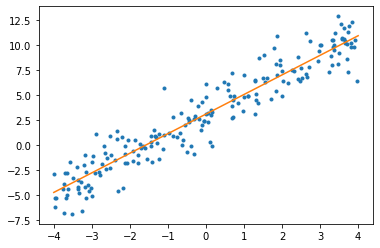

In [47]:
plt.plot(x,y, ".", x_line, y_line)

## Descenso del gradiente 

<img src="fig3.jpeg" width="600px" >

### Batch Gradient Descent

El cómputo se realiza sobre la totalidad de los datos

<img src="eq5.jpeg" width="300px" >

<img src="fig4.jpeg" width="600px" >

<img src="fig5.png" width="600px" >

<img src="fig6.jpeg" width="600px" >

In [48]:
from sklearn.linear_model import SGDRegressor

In [52]:
sgdr = SGDRegressor()

In [53]:
sgdr.fit(x_train, y_train.flatten())

SGDRegressor()

In [54]:
sgdr.intercept_

array([3.09063427])

In [55]:
sgdr.coef_

array([1.96719716])

In [66]:
sgdr = SGDRegressor(eta0=0.0000001, tol=0.000001, max_iter=100000)
sgdr.fit(x_train, y_train.flatten())
print(sgdr.intercept_, sgdr.coef_)

[0.09389573] [0.3413587]


/home/arielthenon/Software/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [73]:
sgdr = SGDRegressor(eta0=10)
sgdr.fit(x_train, y_train.flatten())
print(sgdr.intercept_, sgdr.coef_)

[4.24216615e+11] [8.22896756e+11]


#### Normalización

<img src="fig7.jpeg" width="600px" >

In [74]:
from sklearn.preprocessing import StandardScaler

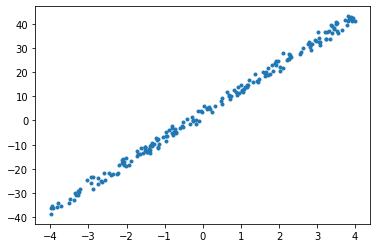

In [75]:
x = np.random.uniform(-4,4,(200,1))
y = 3 + 10*x + 1.5*np.random.randn(200,1)
plt.plot(x,y, ".")

In [78]:
x.std(), x.min(), x.max()

(2.2595124614389324, -3.9936968520256384, 3.991814107683952)

In [79]:
y.std(), y.min(), y.max()

(22.778190092070176, -38.64014522262434, 43.114310887262604)

In [80]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

In [82]:
x_norm = x_scaler.fit_transform(x)
y_norm = y_scaler.fit_transform(y)

In [83]:
x_norm.std()

1.0

In [84]:
y_norm.std()

1.0

In [85]:
sgdr = SGDRegressor()

In [87]:
sgdr.fit(x_norm, y_norm.flatten())

SGDRegressor()

In [88]:
sgdr.coef_

array([0.98801339])

In [89]:
sgdr.intercept_

array([0.00032265])

In [90]:
test = [[2]]

In [91]:
sgdr.predict(test)

array([1.97634943])

In [92]:
test_norm = x_scaler.transform(test)

In [93]:
test_norm

array([[0.78912272]])

In [94]:
sgdr.predict(test_norm)

array([0.77998646])

In [95]:
y_scaler.inverse_transform(sgdr.predict(test_norm))

array([22.97099442])

In [100]:
def predecir(x):
    x_norm = x_scaler.transform(x)
    y_pred_norm = sgdr.predict(x_norm)
    y_pred = y_scaler.inverse_transform(y_pred_norm)
    return y_pred

In [101]:
test = [[3],[2.5],[-1],[2.25],[-.32]]

In [102]:
predecir(test)

array([32.93117707, 27.95108575, -6.90955352, 25.46104008, -0.13662932])

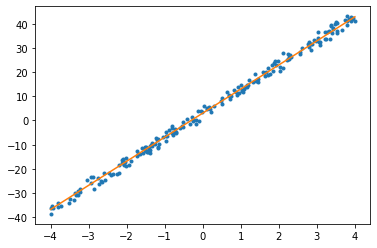

In [103]:
x_graf = np.linspace(-4,4,200).reshape(-1,1)
y_graf = predecir(x_graf)
plt.plot(x,y,".", x_graf, y_graf)

### Stochastic Gradient Descent

Se calcula sobre un punto (elegido al azar) a la vez

<img src="fig8.jpeg" width="600px" >

### Mini Batch Gradient Descent

Se calcula sobre porciones de los datos tomados al azar

<img src="fig9.jpeg" width="600px" >

## Regresión polinomial

<img src="fig10.jpeg" width="600px" >

<img src="fig11.jpeg" width="600px" >

x -> y  
lineal:  y = ax + b

cuadratico: y = ax^2 + bx +c  
u = x^2  
v = x  
y = au + bv + c

In [104]:
from sklearn.preprocessing import PolynomialFeatures

In [109]:
x = np.random.uniform(-12,8,(200, 1))

In [116]:
y = 0.5*x**3 + 3*x**2 - 20*x + 6 + 30*np.random.randn(200,1)

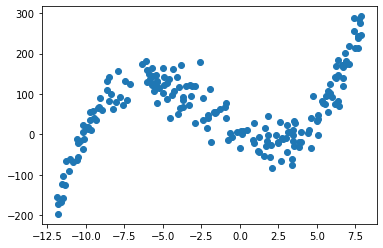

In [117]:
plt.plot(x,y, "o")

In [121]:
poly3 = PolynomialFeatures(degree=3, include_bias=False)
x_3 = poly3.fit_transform(x)

In [122]:
LR = LinearRegression()
LR.fit(x_3, y)

LinearRegression()

In [124]:
LR.intercept_, LR.coef_

(array([6.44107367]), array([[-21.58642671,   3.10847617,   0.52230171]]))

In [126]:
test = [[5]]
test_3 = poly3.transform(test)
LR.predict(test_3)

array([[41.50855817]])

In [127]:
x_graf = np.linspace(-12,8,200).reshape(-1,1)
y_graf = LR.predict(poly3.transform(x_graf))

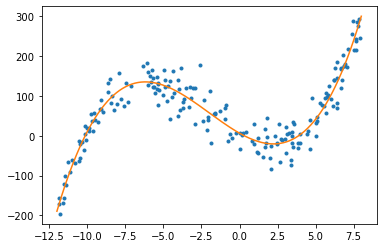

In [129]:
plt.plot(x,y,".", x_graf, y_graf)

In [160]:
sgdr = SGDRegressor(eta0=0.0000000001, tol=0.00001, max_iter=100000)

In [161]:
sgdr.fit(x_3,y.flatten())

/home/arielthenon/Software/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDRegressor(eta0=1e-10, max_iter=100000, tol=1e-05)

In [162]:
y_graf2 = sgdr.predict(poly3.transform(x_graf))

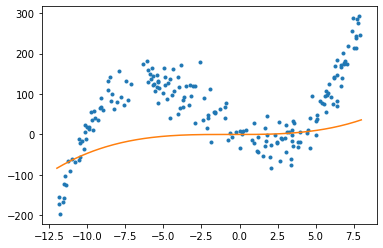

In [163]:
plt.plot(x,y,".", x_graf, y_graf2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7feb5daefa90>,
 'caps': [<matplotlib.lines.Line2D at 0x7feb5d502190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feb5daef730>,
 'medians': [<matplotlib.lines.Line2D at 0x7feb5d502850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feb5d502b50>,
 'means': []}

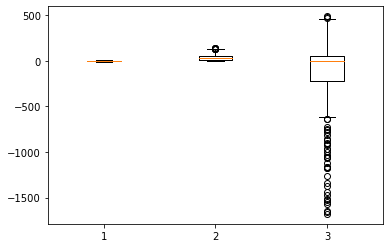

In [170]:
plt.boxplot(x_3)

{'whiskers': [<matplotlib.lines.Line2D at 0x7feb5dd89550>,
 'caps': [<matplotlib.lines.Line2D at 0x7feb5dd50cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feb5ddd10d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7feb5dd6d370>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feb5ebc6a90>,
 'means': []}

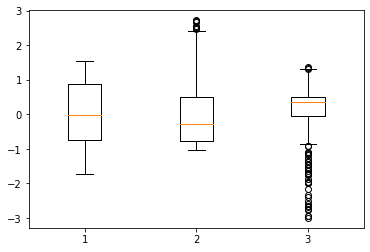

In [172]:
scaler1 = StandardScaler()
plt.boxplot(scaler1.fit_transform(x_3))

In [173]:
from sklearn.preprocessing import MinMaxScaler

{'whiskers': [<matplotlib.lines.Line2D at 0x7feb5d8a2970>,
 'caps': [<matplotlib.lines.Line2D at 0x7feb5d8b6070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feb5d8a2610>,
 'medians': [<matplotlib.lines.Line2D at 0x7feb5d8b6730>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feb5d8b6a30>,
 'means': []}

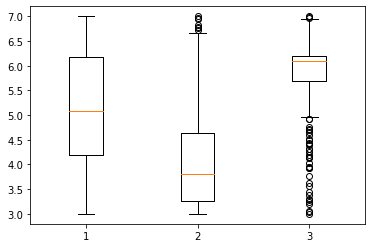

In [176]:
scaler2 = MinMaxScaler((3,7))
plt.boxplot(scaler2.fit_transform(x_3))

### Overfitting

<img src="fig12.jpeg" width="600px" >

#### Regularización

Agrega una penalización a los parámetros muy grandes

##### Ridge Regression

<img src="ridge.jpeg" width="300px" >


##### Lasso Regression

<img src="lasso.jpeg" width="300px" >

#### Early stopping

<img src="fig13.jpeg" width="600px" >